# Name:-Gauri Deshpande


# OASIS INFOBYTE INTERNSHIP

# TASK 5

# Sales Prediction Using Python

In [30]:
 import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
adv = pd.read_csv(r"C:\Users\gauri\Downloads\archive (4)\Advertising.csv")

In [4]:
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
adv.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
adv.drop(adv.columns[[0]], axis=1,inplace=True)

In [9]:
adv.sample(5)

,TV,Radio,Newspaper,Sales
114,78.2,46.8,34.5,14.6
35,290.7,4.1,8.5,12.8
55,198.9,49.4,60.0,23.7
82,75.3,20.3,32.5,11.3
65,69.0,9.3,0.9,9.3


In [10]:
adv.shape

(200, 4)

In [11]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
x=adv.iloc[:,0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y=adv.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [14]:
# Training data ----main work starts from here

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
y_train

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [16]:
x_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


Text(0.5, 1.0, 'TV Sales view')

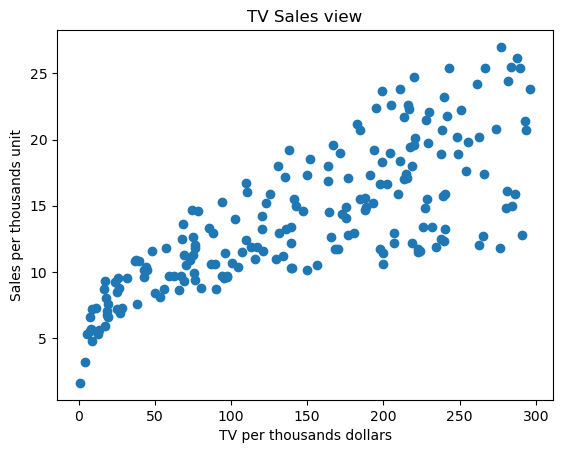

In [17]:
plt.scatter(adv['TV'],adv['Sales'])
plt.xlabel("TV per thousands dollars")
plt.ylabel("Sales per thousands unit")
plt.title("TV Sales view")

Text(0.5, 1.0, 'Radio Sales view')

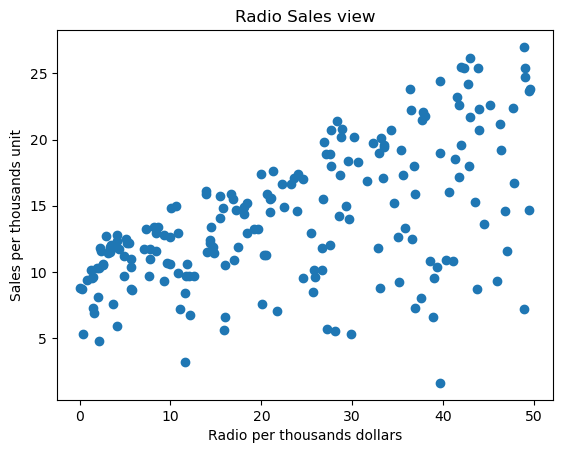

In [18]:
plt.scatter(adv['Radio'],adv['Sales'])
plt.xlabel("Radio per thousands dollars")
plt.ylabel("Sales per thousands unit")
plt.title("Radio Sales view")

Text(0.5, 1.0, 'Newspaper Sales views')

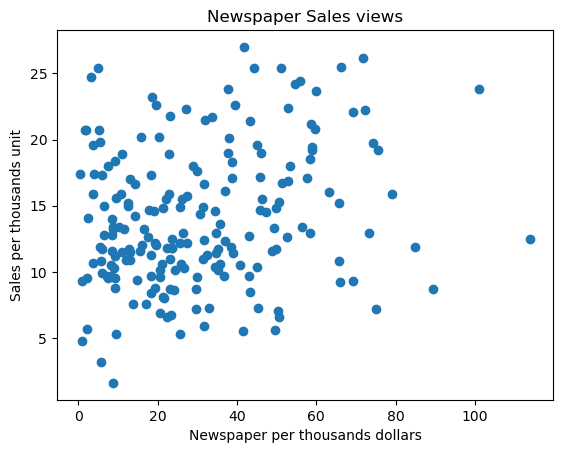

In [19]:
plt.scatter(adv['Newspaper'],adv['Sales'])
plt.xlabel("Newspaper per thousands dollars")
plt.ylabel("Sales per thousands unit")
plt.title("Newspaper Sales views")

Text(13.819444444444445, 0.5, 'Density')

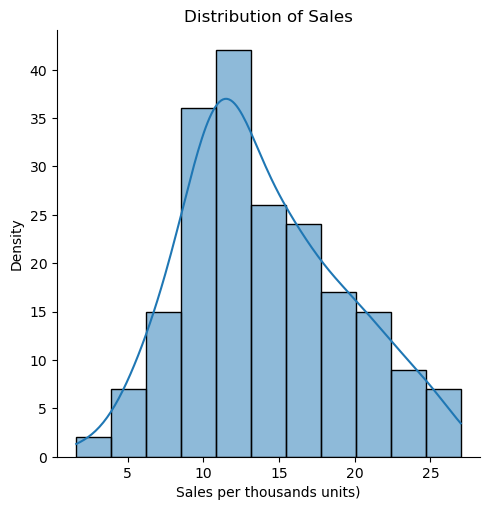

In [20]:
sns.displot(y, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales per thousands units)')
plt.ylabel('Density')

Text(0, 0.5, 'Advertising Spending per thousands of dollars')

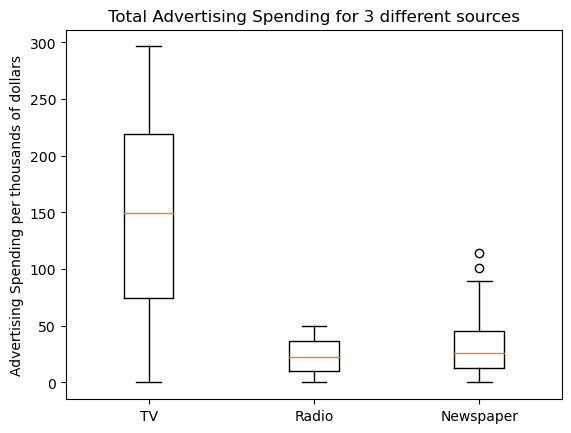

In [21]:
plt.boxplot([adv['TV'], adv['Radio'], adv['Newspaper']])
plt.title('Total Advertising Spending for 3 different sources')
plt.xticks([1, 2, 3], ['TV', 'Radio', 'Newspaper'])
plt.ylabel('Advertising Spending per thousands of dollars')

Text(0, 0.5, 'Frequency')

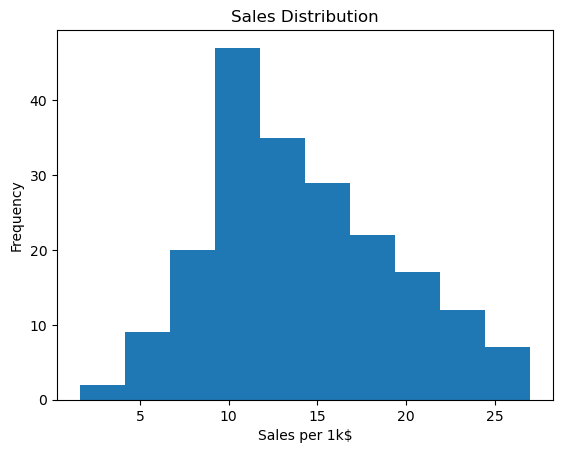

In [22]:
plt.hist(adv['Sales'], bins=10)
plt.title('Sales Distribution')
plt.xlabel('Sales per 1k$')
plt.ylabel('Frequency')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_p = lr.predict(x_test_scaled)


In [24]:
from sklearn.metrics import r2_score

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_p = lr.predict(x_test_scaled)

accuracy = r2_score(y_test, y_p)
print("Accuracy (R-squared):", accuracy)


Accuracy (R-squared): 0.8303910270450665
